In [84]:
import numpy as np
import matplotlib.pyplot as plt
import Pk_library as PKL
from matplotlib.lines import Line2D
import cube
import plotPS as pps 
from figure import CustomFigure

In [85]:
boxsize = 5120 #Mpc
ngrid = 256 #px
resolution = boxsize/ngrid #Mpc/px
k_nyquist = np.pi / resolution 
k_boxsize = 2*np.pi/boxsize

datapath = "/mn/stornext/d10/data/johanmkr/simulations/gevolution_first_runs/"
seed = 1234
gr_v_path = datapath + f"seed{seed:04d}/gr/gr_snap005_phi.h5"
newton_v_path = datapath + f"seed{seed:04d}/newton/newton_snap005_phi.h5"
gr_cube = cube.Cube(gr_v_path)
newton_cube = cube.Cube(newton_v_path)

In [86]:
# Bispectra analysis

k1 = 1e-2 #h/Mpc
k2 = 5e-3 #h/Mpc
MAS = "CIC" 
threads = 32
theta = np.linspace(0, np.pi,50) 
gr_data = gr_cube.data.astype(np.float32)
newton_data = newton_cube.data.astype(np.float32)


In [87]:
# Compute spectra
grBBk = PKL.Bk(gr_data, boxsize, k1, k2, theta, MAS, threads)
newBBk = PKL.Bk(newton_data, boxsize, k1, k2, theta, MAS, threads)



Computing bispectrum of the field...
Time to compute bispectrum = 9.01

Computing bispectrum of the field...
Time to compute bispectrum = 10.36


In [88]:
# Quantities
gBk = grBBk.B # Bispectrum
gQk = grBBk.Q # Reduced bispectrum
gPk = grBBk.Pk # Power spectrum
gk = grBBk.k # k modes

nBk = newBBk.B # Bispectrum
nQk = newBBk.Q # Reduced bispectrum
nPk = newBBk.Pk # Power spectrum
nk = newBBk.k # k modes

In [89]:
theta

array([0.        , 0.06411414, 0.12822827, 0.19234241, 0.25645654,
       0.32057068, 0.38468481, 0.44879895, 0.51291309, 0.57702722,
       0.64114136, 0.70525549, 0.76936963, 0.83348377, 0.8975979 ,
       0.96171204, 1.02582617, 1.08994031, 1.15405444, 1.21816858,
       1.28228272, 1.34639685, 1.41051099, 1.47462512, 1.53873926,
       1.60285339, 1.66696753, 1.73108167, 1.7951958 , 1.85930994,
       1.92342407, 1.98753821, 2.05165235, 2.11576648, 2.17988062,
       2.24399475, 2.30810889, 2.37222302, 2.43633716, 2.5004513 ,
       2.56456543, 2.62867957, 2.6927937 , 2.75690784, 2.82102197,
       2.88513611, 2.94925025, 3.01336438, 3.07747852, 3.14159265])

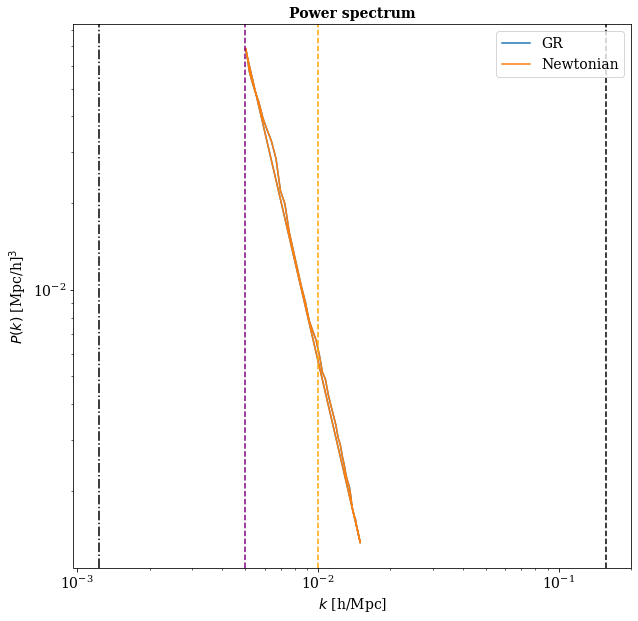

In [90]:
fig, ax = plt.subplots(figsize=(10,10))

ax.loglog(gk[1:-1], gPk[1:-1], label="GR")
ax.loglog(nk[1:-1], nPk[1:-1], label="Newtonian")
ax.legend()
ax.set_title("Power spectrum")
ax.set_xlabel(r"$k$ [h/Mpc]")
ax.set_ylabel(r"$P(k)$ [Mpc/h]$^3$")
ax.axvline(k1, color="orange", linestyle="--")
ax.axvline(k2, color="purple", linestyle="--")
ax.axvline(k_nyquist, color="black", linestyle="--")
ax.axvline(k_boxsize, color="black", linestyle="-.")


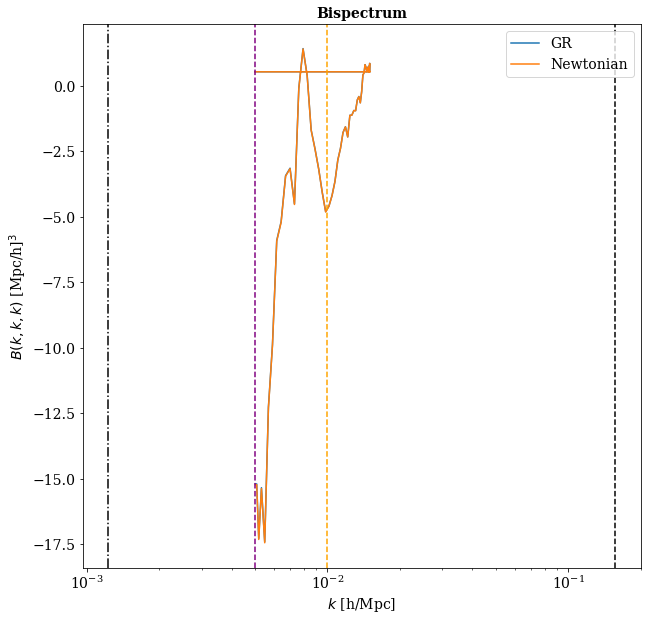

In [91]:
fig, ax = plt.subplots(figsize=(10,10))

ax.semilogx(gk[1:-1], gBk, label="GR")
ax.semilogx(nk[1:-1], nBk, label="Newtonian")
ax.legend()
ax.set_title("Bispectrum")
ax.set_xlabel(r"$k$ [h/Mpc]")
ax.set_ylabel(r"$B(k,k,k)$ [Mpc/h]$^3$")
ax.axvline(k1, color="orange", linestyle="--")
ax.axvline(k2, color="purple", linestyle="--")
ax.axvline(k_nyquist, color="black", linestyle="--")
ax.axvline(k_boxsize, color="black", linestyle="-.")

Text(0.5, 0, '$k$ [h/Mpc]')

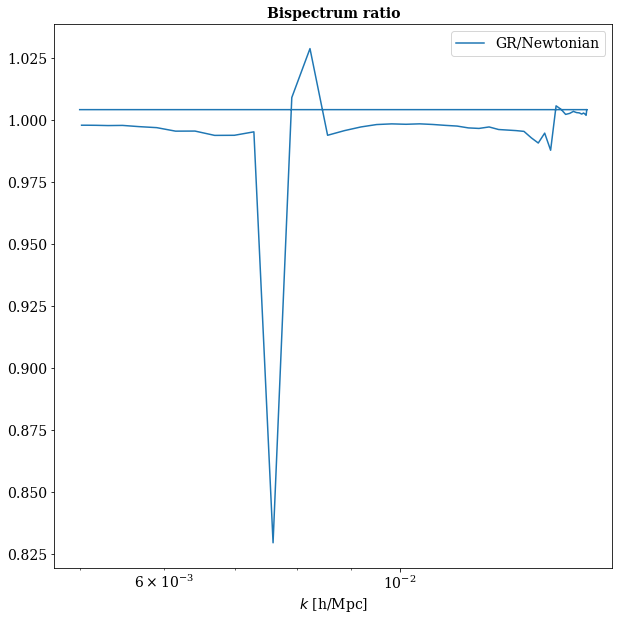

In [92]:
fig, ax = plt.subplots(figsize=(10,10))

ratio = gBk/nBk
ax.semilogx(gk[1:-1], ratio, label="GR/Newtonian")
ax.legend()
ax.set_title("Bispectrum ratio")
ax.set_xlabel(r"$k$ [h/Mpc]")

Text(0, 0.5, '$B(k,k,k)$')

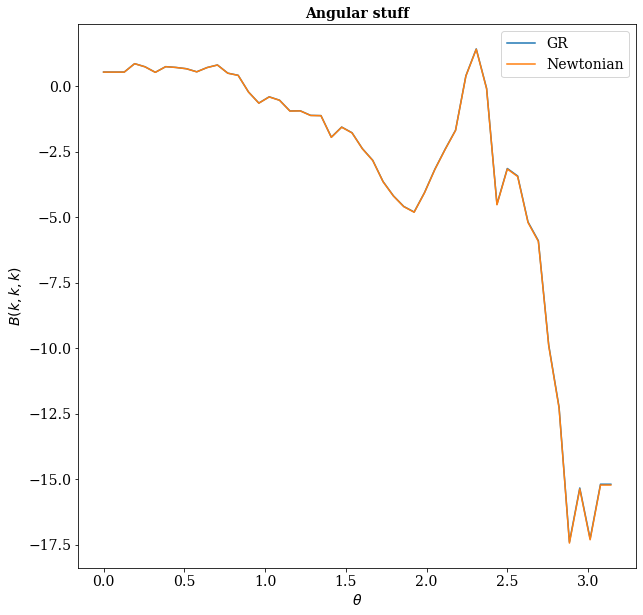

In [93]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(theta, gBk, label="GR")
ax.plot(theta, nBk, label="Newtonian")
ax.legend()
ax.set_title("Angular stuff")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$B(k,k,k)$")
